# 📘 Comprehensive Analysis: Airbnb Pricing and Crime Data
This notebook merges two analyses covering:
- Individual Airbnb listing data from six U.S. states
- Master dataset with average prices
- Crime statistics (robbery, assault per 100k residents)

We explore the data using descriptive statistics, visualizations, and correlation analysis.

## 📊 Initial Data Exploration
We'll start by examining the merged dataset: Airbnb prices and crime rates per state.

In [11]:
import pandas as pd
merged_data = pd.read_csv("/mnt/data/merged_crime_airbnb_data.csv")

In [12]:
merged_data.head()

,State,Robbery_Count,Assault_Count,Population,Robbery_per_100k,Assault_per_100k,Average_Price
0,California,69571,152589,39430000,176.441796,386.987066,275.221784
1,Texas,231345,440114,31290000,739.357622,1406.564398,289.010552
2,Rhode Island,4407,12478,1112000,396.312950,1122.122302,339.301494
3,New York,39186,66813,8258000,474.521676,809.069993,207.752039
4,Oregon,27976,69591,4272000,654.868914,1629.002809,128.218975


In [13]:
merged_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6 entries, 0 to 5
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   State             6 non-null      object 
 1   Robbery_Count     6 non-null      int64  
 2   Assault_Count     6 non-null      int64  
 3   Population        6 non-null      int64  
 4   Robbery_per_100k  6 non-null      float64
 5   Assault_per_100k  6 non-null      float64
 6   Average_Price     6 non-null      float64
dtypes: float64(3), int64(3), object(1)
memory usage: 468.0+ bytes


In [14]:
merged_data.describe()

,Robbery_Count,Assault_Count,Population,Robbery_per_100k,Assault_per_100k,Average_Price
count,6.00000,6.000000,6.000000e+00,6.000000,6.000000,6.000000
mean,74329.00000,144737.166667,1.538667e+07,560.827271,1157.931540,234.604660
std,81178.92037,152866.683360,1.590159e+07,266.265172,488.075203,80.037431
min,4407.00000,12478.000000,1.112000e+06,176.441796,386.987066,128.218975
25%,30778.50000,67507.500000,5.193500e+06,415.865131,887.333070,178.030348
50%,54378.50000,98214.500000,8.108000e+06,564.695295,1264.343350,241.486911
75%,72509.50000,146151.250000,2.553200e+07,718.235445,1547.023105,285.563360
max,231345.00000,440114.000000,3.943000e+07,923.460669,1629.002809,339.301494


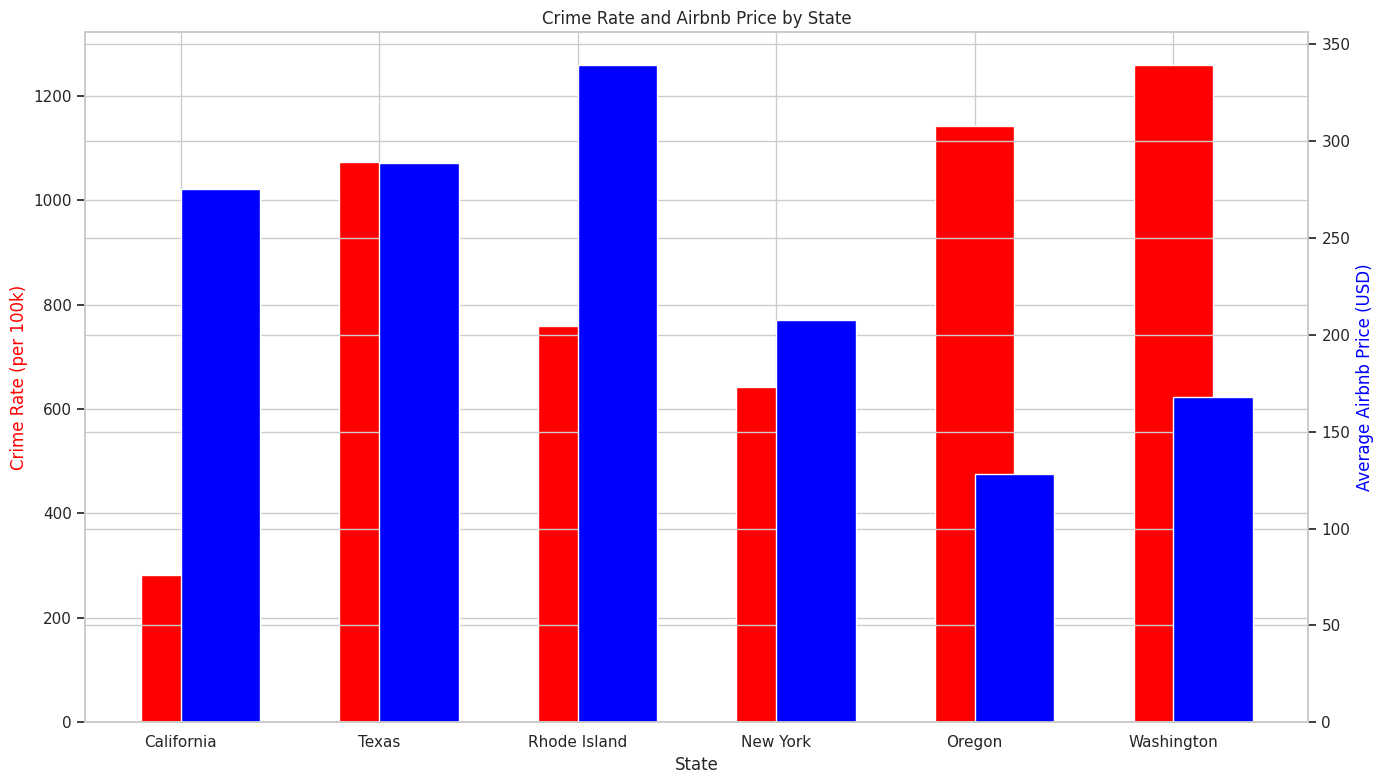

--- Pearson Correlations ---
Robbery vs Airbnb Price: r = -0.515, p-value = 0.2954
Assault vs Airbnb Price: r = -0.467, p-value = 0.3501

--- Spearman Correlations ---
Robbery vs Airbnb Price: rho = -0.429, p-value = 0.3965
Assault vs Airbnb Price: rho = -0.543, p-value = 0.2657


<ipython-input-15-2702458371>:51: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=correlation_results, x='Metric', y='Correlation', palette='coolwarm')


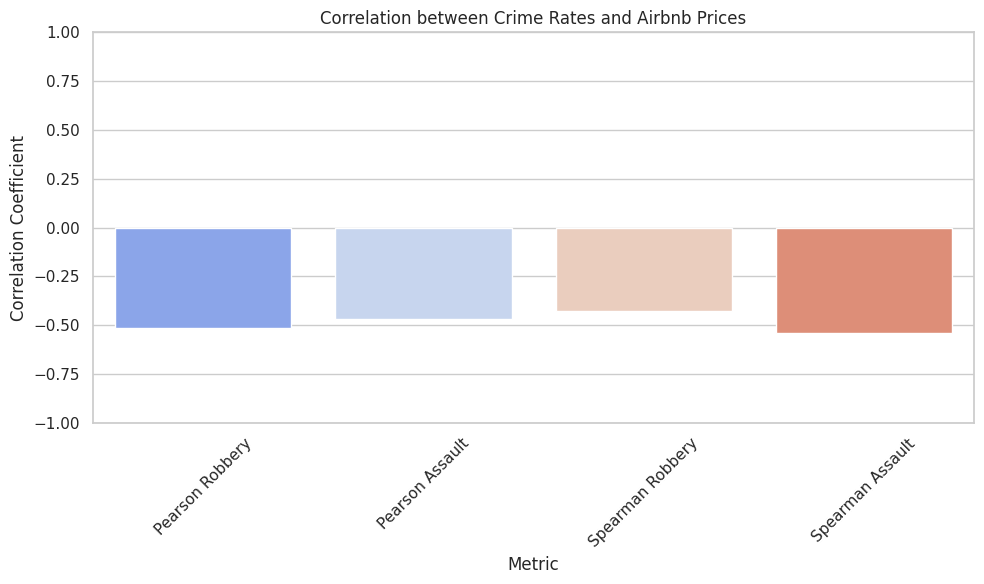

In [15]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import pearsonr, spearmanr

merged_data = pd.read_csv("/mnt/data/merged_crime_airbnb_data.csv")

sns.set_style("whitegrid")

fig, ax1 = plt.subplots(figsize=(14,8))

crime_scores = (merged_data['Robbery_per_100k'] + merged_data['Assault_per_100k']) / 2
ax1.bar(merged_data['State'], crime_scores, color='red', width=0.4, label='Average Crime Rate', align='center')

ax2 = ax1.twinx()
ax2.bar(merged_data['State'], merged_data['Average_Price'], color='blue', width=0.4, label='Average Airbnb Price', align='edge')

ax1.set_xlabel('State')
ax1.set_ylabel('Crime Rate (per 100k)', color='red')
ax2.set_ylabel('Average Airbnb Price (USD)', color='blue')

plt.title('Crime Rate and Airbnb Price by State')
fig.tight_layout()
plt.show()

pearson_robbery = pearsonr(merged_data['Robbery_per_100k'], merged_data['Average_Price'])
pearson_assault = pearsonr(merged_data['Assault_per_100k'], merged_data['Average_Price'])

spearman_robbery = spearmanr(merged_data['Robbery_per_100k'], merged_data['Average_Price'])
spearman_assault = spearmanr(merged_data['Assault_per_100k'], merged_data['Average_Price'])

print("--- Pearson Correlations ---")
print(f"Robbery vs Airbnb Price: r = {pearson_robbery[0]:.3f}, p-value = {pearson_robbery[1]:.4f}")
print(f"Assault vs Airbnb Price: r = {pearson_assault[0]:.3f}, p-value = {pearson_assault[1]:.4f}\n")

print("--- Spearman Correlations ---")
print(f"Robbery vs Airbnb Price: rho = {spearman_robbery.correlation:.3f}, p-value = {spearman_robbery.pvalue:.4f}")
print(f"Assault vs Airbnb Price: rho = {spearman_assault.correlation:.3f}, p-value = {spearman_assault.pvalue:.4f}")

correlation_results = pd.DataFrame({
    'Metric': ['Pearson Robbery', 'Pearson Assault', 'Spearman Robbery', 'Spearman Assault'],
    'Correlation': [
        pearson_robbery[0],
        pearson_assault[0],
        spearman_robbery.correlation,
        spearman_assault.correlation
    ]
})

plt.figure(figsize=(10,6))
sns.barplot(data=correlation_results, x='Metric', y='Correlation', palette='coolwarm')
plt.title('Correlation between Crime Rates and Airbnb Prices')
plt.ylabel('Correlation Coefficient')
plt.ylim(-1, 1)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()



## 🔄 Merged Notebook: Additional Airbnb and Crime Analysis

# 📊 Airbnb and Crime Data Analysis
This notebook explores Airbnb pricing and crime statistics across various U.S. states. It includes:
- Visual analysis of Airbnb listings in six cities
- Aggregated Airbnb prices from a master dataset
- Crime rate comparisons (robbery and assault) by state

In [16]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style='whitegrid')

In [17]:
# File paths and data loading
files = {
    'California': '/mnt/data/final_airbnb_california_cleaned.csv',
    'New York': '/mnt/data/final_airbnb_newyork_cleaned.csv',
    'Oregon': '/mnt/data/final_airbnb_oregon_cleaned.csv',
    'Rhode Island': '/mnt/data/final_airbnb_rhodeisland_cleaned.csv',
    'Texas': '/mnt/data/final_airbnb_texas_cleaned.csv',
    'Washington': '/mnt/data/final_airbnb_washington_cleaned.csv',
    'Master Airbnb': '/mnt/data/master_airbnb_prices.csv',
    'Crime': '/mnt/data/final_crime_data.csv'
}

# Load city-level Airbnb data
city_dfs = {city: pd.read_csv(path) for city, path in files.items() if city not in ['Master Airbnb', 'Crime']}
master_airbnb_df = pd.read_csv(files['Master Airbnb'])
crime_df = pd.read_csv(files['Crime'])

## 🗂 Dataset Descriptions
- **City-level Airbnb datasets**: Contain listing-level pricing and metadata.
- **Master Airbnb dataset**: Average prices aggregated per state.
- **Final crime dataset**: State-level crime rates per 100,000 people.

## 📉 Airbnb Price Distributions by City

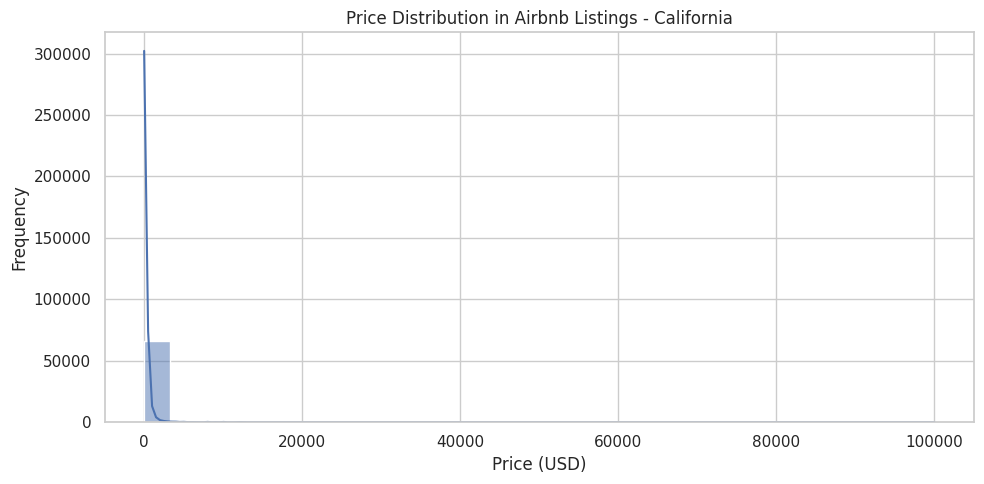

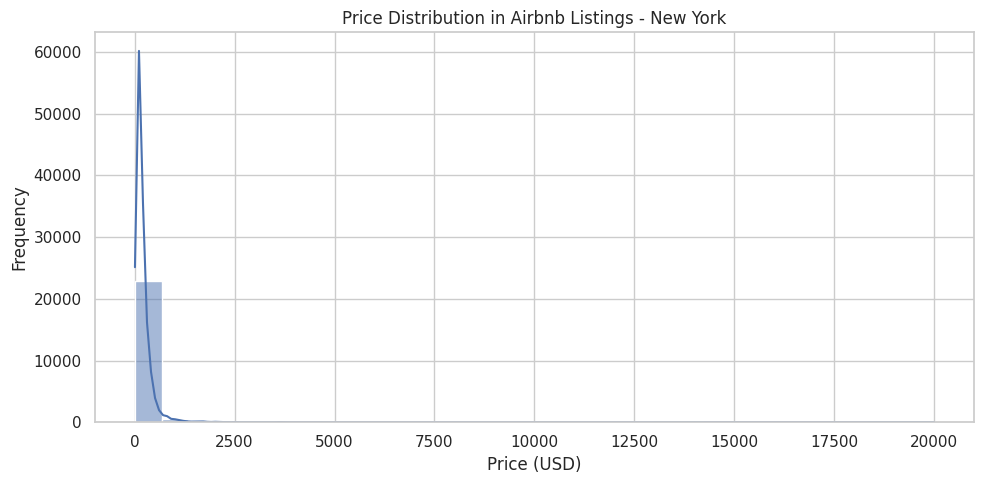

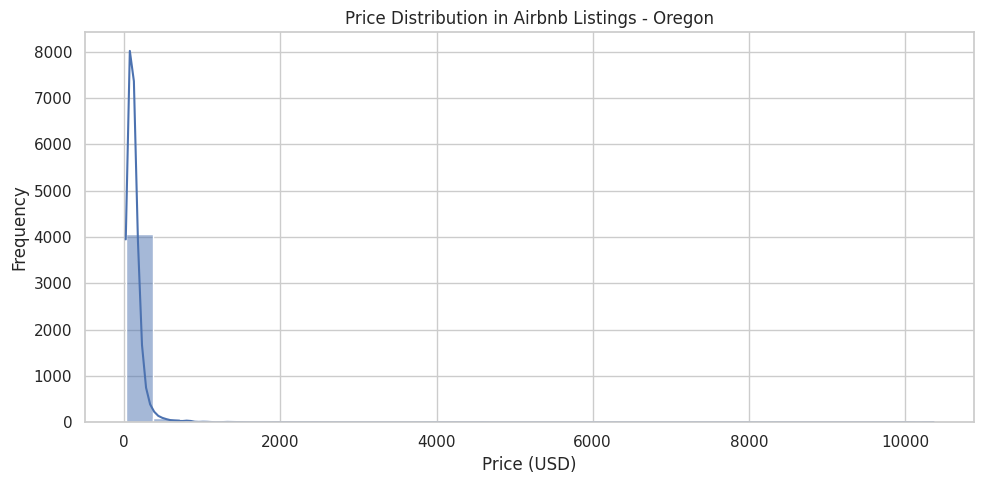

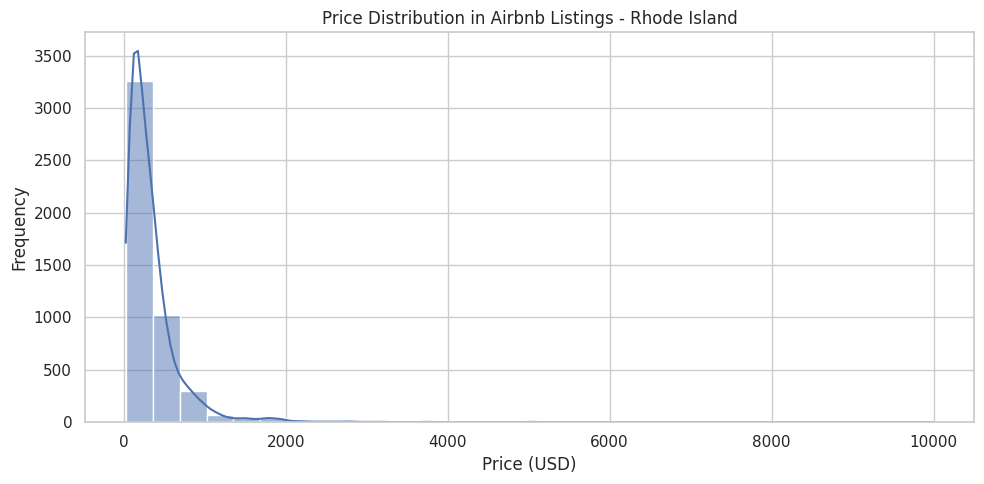

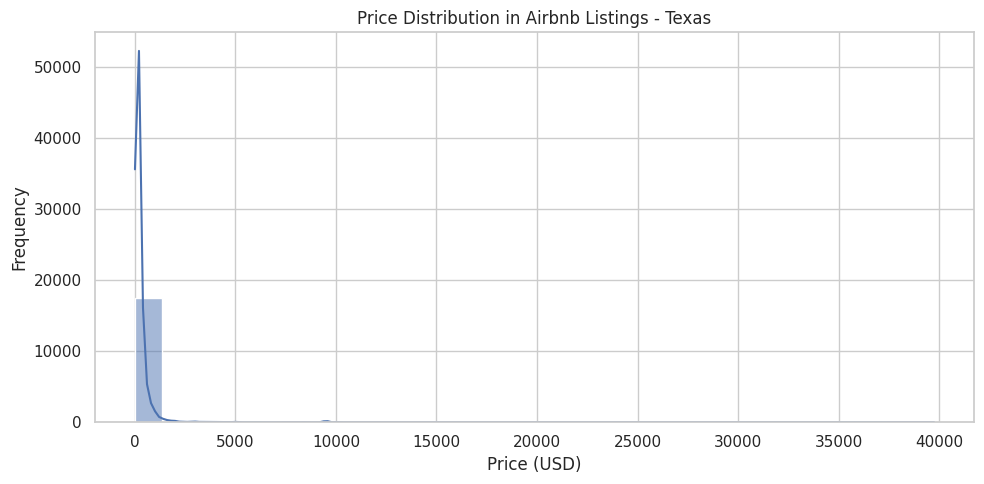

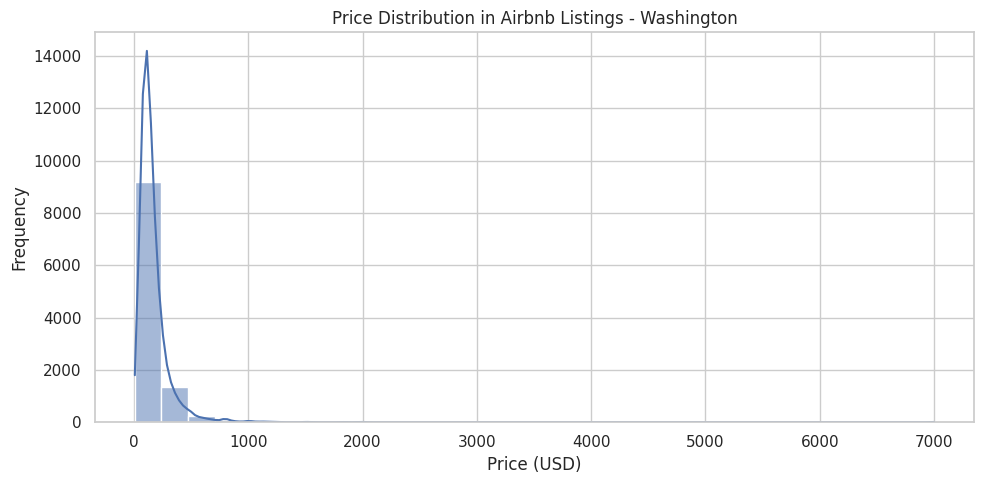

In [18]:
# Plot Airbnb price distributions for each city
for city, df in city_dfs.items():
    plt.figure(figsize=(10, 5))
    sns.histplot(df['price'], kde=True, bins=30)
    plt.title(f'Price Distribution in Airbnb Listings - {city}')
    plt.xlabel('Price (USD)')
    plt.ylabel('Frequency')
    plt.tight_layout()
    plt.show()

## 📊 Master Airbnb Dataset

In [19]:
master_airbnb_df.head()

,State,Average_Price
0,California,275.221784
1,Texas,289.010552
2,New York,207.752039
3,Oregon,128.218975
4,Rhode Island,339.301494


<ipython-input-20-1949257151>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=master_airbnb_df, x='State', y='Average_Price', palette='Blues_d')


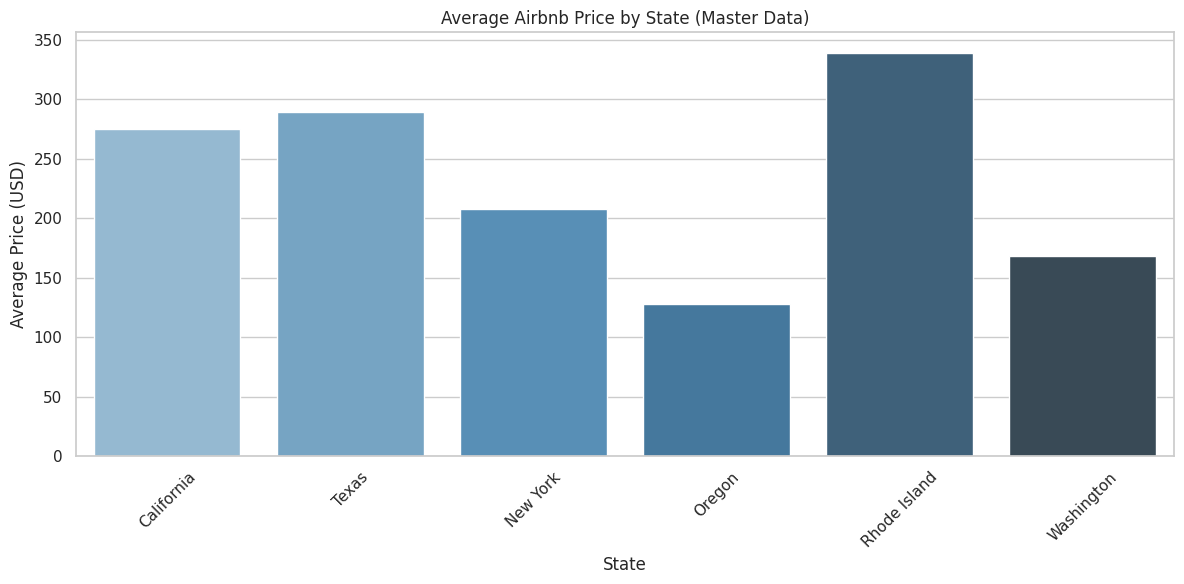

In [20]:
plt.figure(figsize=(12, 6))
sns.barplot(data=master_airbnb_df, x='State', y='Average_Price', palette='Blues_d')
plt.title('Average Airbnb Price by State (Master Data)')
plt.ylabel('Average Price (USD)')
plt.xlabel('State')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

## 🕵️‍♂️ Final Crime Dataset

In [21]:
crime_df.head()

,State,Robbery_Count,Assault_Count,Population,Robbery_per_100k,Assault_per_100k
0,California,69571,152589,39430000,176.441796,386.987066
1,Texas,231345,440114,31290000,739.357622,1406.564398
2,Rhode Island,4407,12478,1112000,396.312950,1122.122302
3,New York,39186,66813,8258000,474.521676,809.069993
4,Oregon,27976,69591,4272000,654.868914,1629.002809


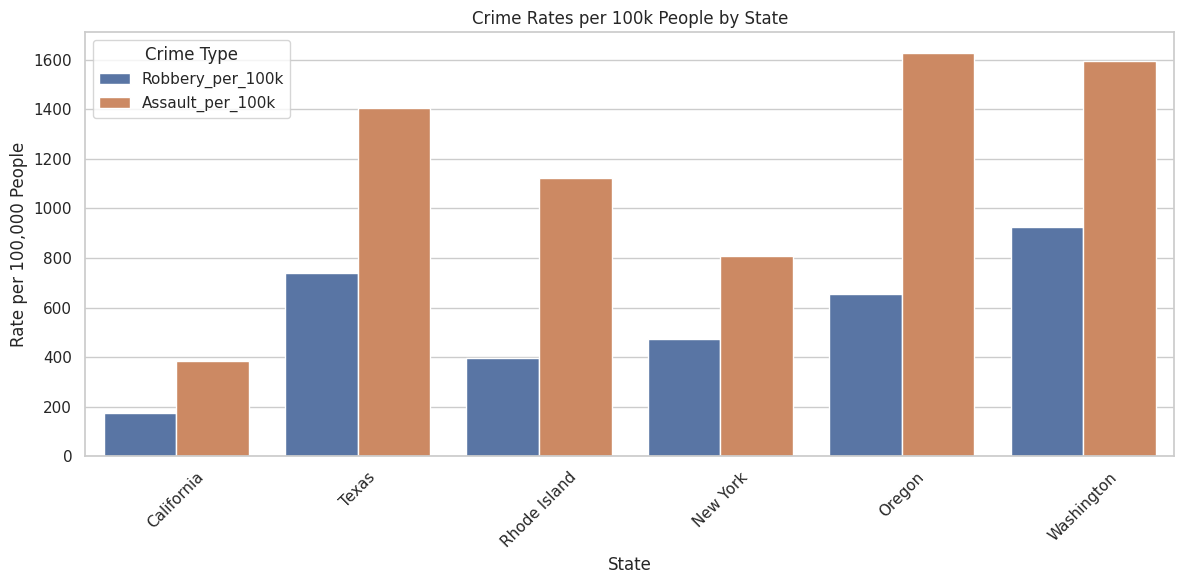

In [22]:
# Plot Crime Rates by State (Robbery and Assault only)
available_crime_cols = [col for col in ['Robbery_per_100k', 'Assault_per_100k'] if col in crime_df.columns]
plt.figure(figsize=(12, 6))
crime_long = crime_df.melt(id_vars='State', value_vars=available_crime_cols,
                           var_name='Crime_Type', value_name='Rate_per_100k')
sns.barplot(data=crime_long, x='State', y='Rate_per_100k', hue='Crime_Type')
plt.title('Crime Rates per 100k People by State')
plt.xlabel('State')
plt.ylabel('Rate per 100,000 People')
plt.xticks(rotation=45)
plt.legend(title='Crime Type')
plt.tight_layout()
plt.show()